In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

In [2]:
from google.colab import files 
## Upload 'Heart valve dissection data.csv' 
files.upload();

Saving Heart valve dissection data.csv to Heart valve dissection data.csv


{'Heart valve dissection data.csv': b',Age,Sex,Weight_kg,Height_cm,dissection_date,AVD,PVD,Id\n0,2.0,female,15.43,86.36,1989-07-07,12.8,15.0,100001\n1,22.0,male,69.0,173.0,1989-10-01,26.1,28.5,100002\n2,0.66,male,15.43,86.36,1989-10-21,18.9,,100003\n3,3.41,female,26.78,63.0,1989-11-17,23.0,25.3,100004\n4,0.75,female,15.43,86.36,1989-11-19,18.9,22.3,100005\n5,10.0,female,44.0,152.0,1991-08-01,18.9,21.2,100006\n6,18.0,female,57.0,163.0,1991-08-11,,18.1,100007\n7,55.0,female,53.0,155.0,1992-03-08,,23.3,100008\n8,17.0,male,75.0,180.0,1993-09-27,22.0,25.3,100009\n9,50.0,male,74.91,176.0,1993-10-20,25.1,,100010\n10,17.0,male,90.0,183.0,1993-10-23,24.1,28.4,100011\n11,52.0,male,108.05,183.0,1993-12-25,,30.5,100012\n12,23.0,female,54.93,157.0,1994-01-25,18.9,22.2,100013\n13,8.0,female,30.87,137.0,1994-01-25,14.8,17.1,100014\n14,16.0,female,64.92,168.0,1994-01-26,21.0,26.4,100015\n15,20.0,male,74.0,191.0,1994-01-26,21.9,23.3,100016\n16,10.0,female,26.0,157.0,1994-02-04,15.8,16.0,100017\n17,19.0

In [3]:
df = pd.read_csv("Heart valve dissection data.csv")
df = df.iloc[:,1:]    ## drop first column, which contains an index, just for tidyness
print("Info -- type of columns, how much missing data:\n")
df.info()
print("\nDescribe -- basic counts and descriptive statistics of numerical columns\n")
print(df.describe())
df

Info -- type of columns, how much missing data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43004 entries, 0 to 43003
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              43004 non-null  float64
 1   Sex              43004 non-null  object 
 2   Weight_kg        43004 non-null  float64
 3   Height_cm        43004 non-null  float64
 4   dissection_date  43004 non-null  object 
 5   AVD              41668 non-null  float64
 6   PVD              30230 non-null  float64
 7   Id               43004 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 2.6+ MB

Describe -- basic counts and descriptive statistics of numerical columns

                Age     Weight_kg  ...           PVD             Id
count  43004.000000  43004.000000  ...  30230.000000   43004.000000
mean      31.323203     72.876794  ...     23.389246  121502.500000
std       18.088236     38.172248  ...    

,Age,Sex,Weight_kg,Height_cm,dissection_date,AVD,PVD,Id
0,2.00,female,15.43,86.36,1989-07-07,12.8,15.0,100001
1,22.00,male,69.00,173.00,1989-10-01,26.1,28.5,100002
2,0.66,male,15.43,86.36,1989-10-21,18.9,NaN,100003
3,3.41,female,26.78,63.00,1989-11-17,23.0,25.3,100004
4,0.75,female,15.43,86.36,1989-11-19,18.9,22.3,100005
...,...,...,...,...,...,...,...,...
42999,13.00,male,24.09,132.08,2019-09-02,17.9,22.3,143000
43000,45.00,male,84.55,175.26,2019-09-03,23.1,NaN,143001
43001,44.00,male,80.00,177.80,2019-09-03,23.0,NaN,143002
43002,35.00,male,97.00,187.96,2019-09-03,25.1,NaN,143003


In [13]:
## Remove rows with missing AVD values - we want to predict this, so imputation is not an option
print(len(df))
df = df[ pd.notnull(df.AVD) ]
print(len(df))

41985
40665


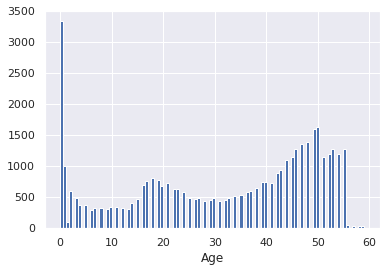

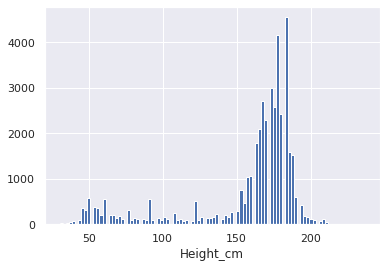

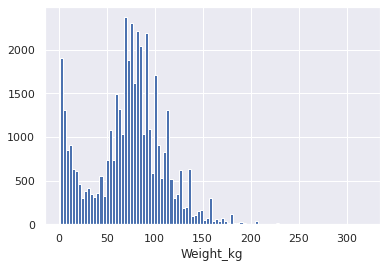

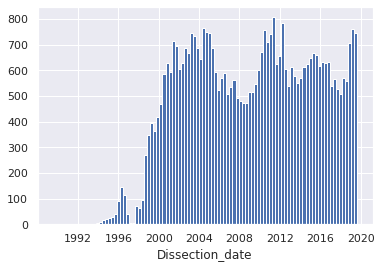

In [4]:
## set column type, otherwise it is interpreted as a string
df["dissection_date"] = pd.to_datetime(df["dissection_date"])

## basic histogram plots
plt.hist(df.Age, bins=100)
plt.xlabel("Age")
plt.show()

## alternative, using Seaborn
#sns.histplot(df, x="Age", bins=100)
#plt.show()

plt.hist(df.Height_cm, bins=100)
plt.xlabel("Height_cm")
plt.show()

plt.hist(df.Weight_kg, bins=100)
plt.xlabel("Weight_kg")
plt.show()

plt.hist(df.dissection_date, bins=100)
plt.xlabel("Dissection_date")
plt.show()

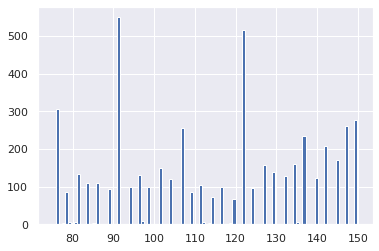

In [5]:
## On the height histogram, between 75 and 150 cm, there are two strong peaks.  Zoom in
df_zoom = df[ (df.Height_cm > 75) & (df.Height_cm < 150)]
plt.hist( df_zoom.Height_cm, bins=100 )
plt.show()

In [6]:
## 523 instances of height precisely 91.44 cm -- that is, 3 foot
df[ (df.Height_cm>91) & (df.Height_cm < 93) ]

,Age,Sex,Weight_kg,Height_cm,dissection_date,AVD,PVD,Id
709,2.00,female,15.90,91.44,1998-05-20,13.8,16.0,100710
784,2.00,male,11.80,91.44,1998-07-26,12.8,15.0,100785
785,5.00,male,20.88,91.44,1998-07-27,15.9,NaN,100786
808,2.83,female,14.07,91.44,1998-08-11,13.8,17.0,100809
857,3.00,female,27.24,91.44,1998-09-07,12.7,17.1,100858
...,...,...,...,...,...,...,...,...
42684,4.00,female,20.05,91.44,2019-07-14,12.8,17.1,142685
42823,4.00,female,14.00,91.44,2019-08-05,14.8,19.2,142824
42863,4.00,female,18.00,91.44,2019-08-11,15.8,20.2,142864
42884,3.00,male,15.00,91.44,2019-08-14,12.8,18.1,142885


In [7]:
## 498 instances of height precisely 121.92 -- that is, 4 foot
df[ (df.Height_cm>121) & (df.Height_cm < 122) ]

,Age,Sex,Weight_kg,Height_cm,dissection_date,AVD,PVD,Id
602,8.0,male,28.14,121.92,1997-11-23,16.8,21.2,100603
741,10.0,male,36.00,121.92,1998-07-06,16.9,23.3,100742
768,9.0,female,18.00,121.92,1998-07-17,17.9,NaN,100769
795,6.0,male,29.55,121.92,1998-07-30,15.8,NaN,100796
796,14.0,female,24.55,121.92,1998-07-30,20.0,NaN,100797
...,...,...,...,...,...,...,...,...
42558,7.0,male,22.73,121.92,2019-06-27,17.9,24.3,142559
42629,12.0,female,59.09,121.92,2019-07-08,20.0,NaN,142630
42850,12.0,female,29.55,121.92,2019-08-10,13.8,22.2,142851
42877,7.0,male,44.00,121.92,2019-08-13,17.9,22.2,142878


43004
41985


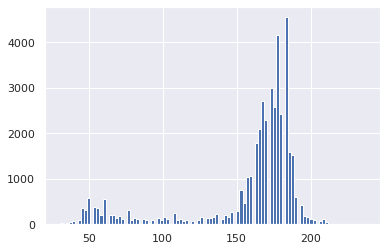

In [8]:
## these instances are likely to be imprecisely measured heights - remove these ~1000 rows
print(len(df))
df = df[ (df.Height_cm != 91.44) & (df.Height_cm != 121.92) ]
print(len(df))

plt.hist(df.Height_cm, bins=100)
plt.show()

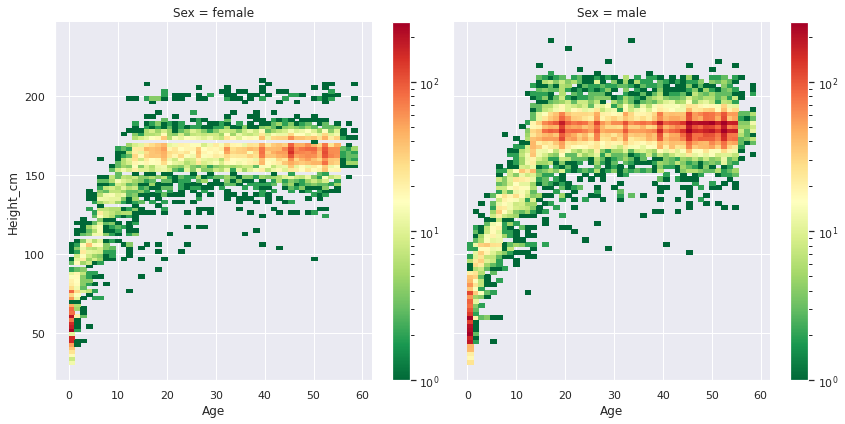

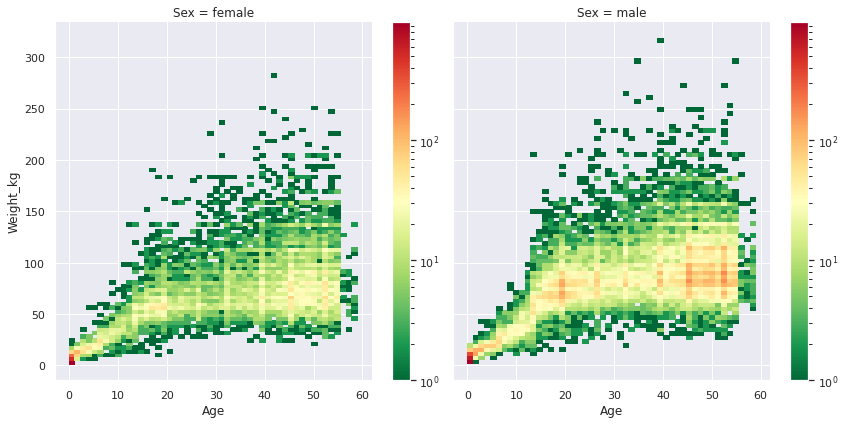

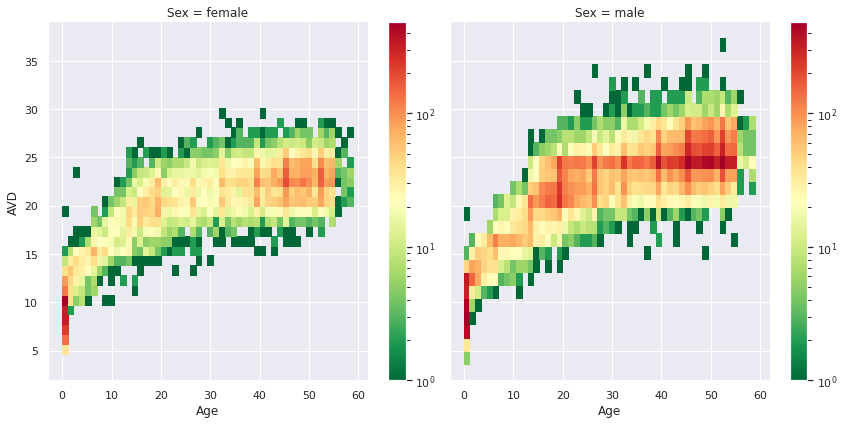

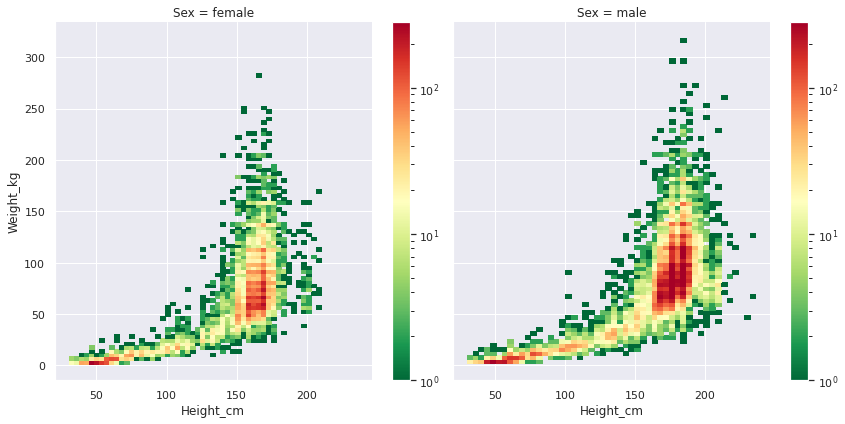

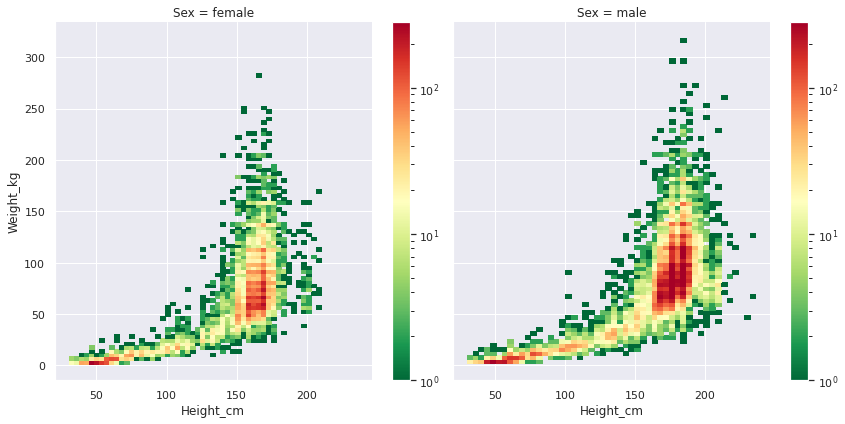

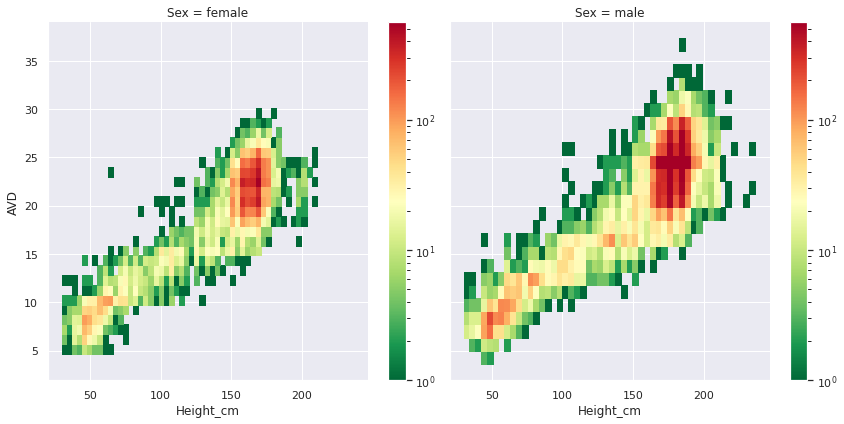

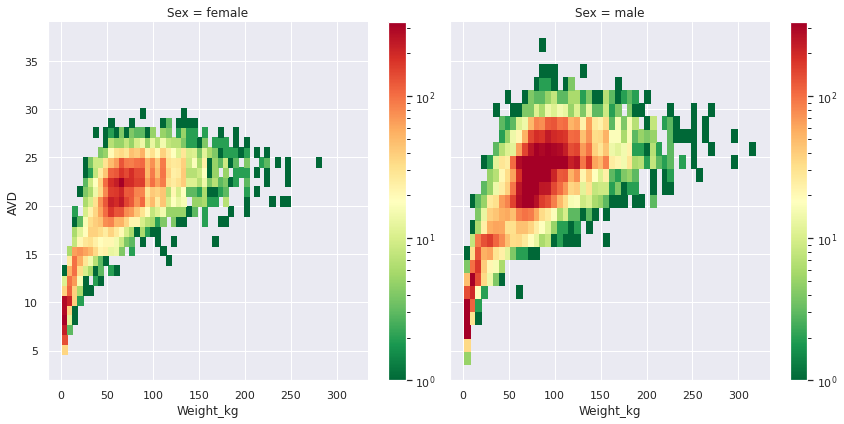

In [9]:
## Two alternative ways to plot histograms

if False:
  plt.hexbin(x=df.Age, y=df.Height_cm, cmap="RdYlGn_r", norm=mpl.colors.LogNorm(), gridsize=(50,50), vmin=None, vmax=None)
  plt.show()

  sns.histplot(df[df.Sex=="male"], x="Age", y="Height_cm", bins=(50,80), 
             cbar=True, cmap="RdYlGn_r", norm=mpl.colors.LogNorm(), vmin=None, vmax=None)
  plt.show()

g = sns.FacetGrid(df, col="Sex", height=6)
g.map(sns.histplot, "Age", "Height_cm", bins=(50,80), cbar=True, cmap="RdYlGn_r", norm=mpl.colors.LogNorm(), vmin=None, vmax=None)
g = sns.FacetGrid(df, col="Sex", height=6)
g.map(sns.histplot, "Age", "Weight_kg", bins=(50,80), cbar=True, cmap="RdYlGn_r", norm=mpl.colors.LogNorm(), vmin=None, vmax=None)
g = sns.FacetGrid(df, col="Sex", height=6)
g.map(sns.histplot, "Age", "AVD", bins=(50,25), cbar=True, cmap="RdYlGn_r", norm=mpl.colors.LogNorm(), vmin=None, vmax=None)
g = sns.FacetGrid(df, col="Sex", height=6)
g.map(sns.histplot, "Height_cm", "Weight_kg", bins=(50,80), cbar=True, cmap="RdYlGn_r", norm=mpl.colors.LogNorm(), vmin=None, vmax=None)
g = sns.FacetGrid(df, col="Sex", height=6)
g.map(sns.histplot, "Height_cm", "Weight_kg", bins=(50,80), cbar=True, cmap="RdYlGn_r", norm=mpl.colors.LogNorm(), vmin=None, vmax=None)
g = sns.FacetGrid(df, col="Sex", height=6)
g.map(sns.histplot, "Height_cm", "AVD", bins=(50,25), cbar=True, cmap="RdYlGn_r", norm=mpl.colors.LogNorm(), vmin=None, vmax=None)
g = sns.FacetGrid(df, col="Sex", height=6)
g.map(sns.histplot, "Weight_kg", "AVD", bins=(50,25), cbar=True, cmap="RdYlGn_r", norm=mpl.colors.LogNorm(), vmin=None, vmax=None)

In [ ]:
## Could investigate how plausible it is to have so many people over 198 cm of height (it is not)

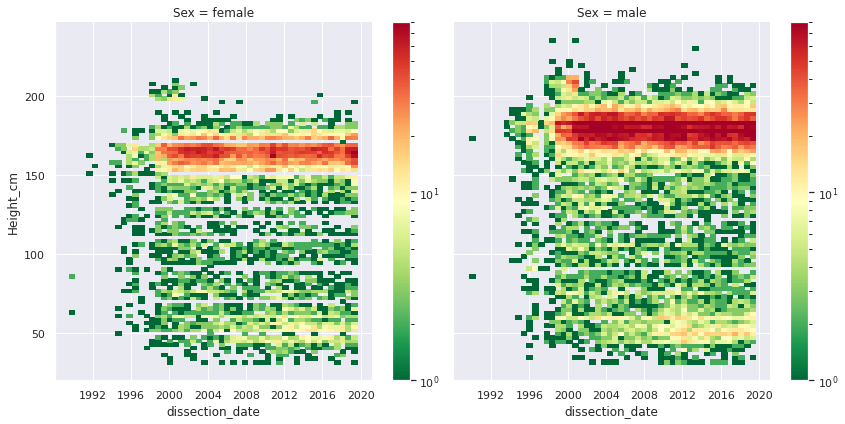

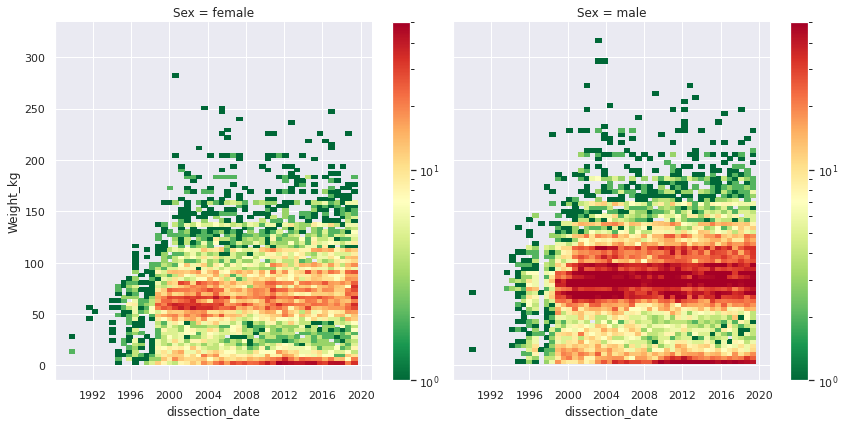

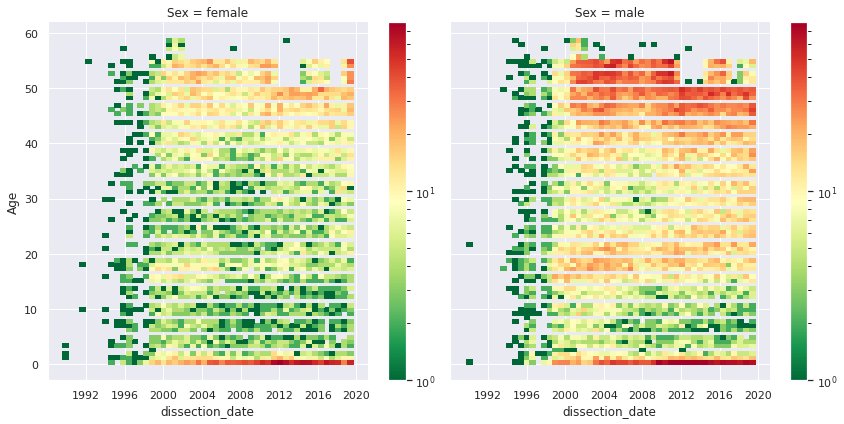

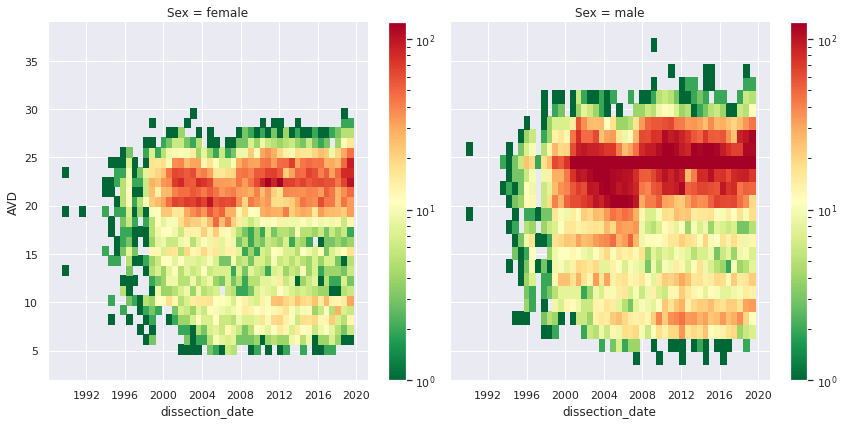

In [10]:
g = sns.FacetGrid(df, col="Sex", height=6)
g.map(sns.histplot, "dissection_date", "Height_cm", bins=(50,80), cbar=True, cmap="RdYlGn_r", norm=mpl.colors.LogNorm(), vmin=None, vmax=None)
g = sns.FacetGrid(df, col="Sex", height=6)
g.map(sns.histplot, "dissection_date", "Weight_kg", bins=(50,80), cbar=True, cmap="RdYlGn_r", norm=mpl.colors.LogNorm(), vmin=None, vmax=None)
g = sns.FacetGrid(df, col="Sex", height=6)
g.map(sns.histplot, "dissection_date", "Age", bins=(50,80), cbar=True, cmap="RdYlGn_r", norm=mpl.colors.LogNorm(), vmin=None, vmax=None)
g = sns.FacetGrid(df, col="Sex", height=6)
g.map(sns.histplot, "dissection_date", "AVD", bins=(50,25), cbar=True, cmap="RdYlGn_r", norm=mpl.colors.LogNorm(), vmin=None, vmax=None)

In [11]:
## There seem to be issues with AVD and dissection date.  Also, it is apparent that most tall people were included around 2000.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


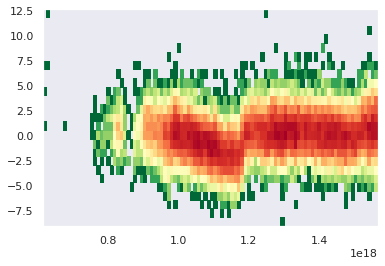

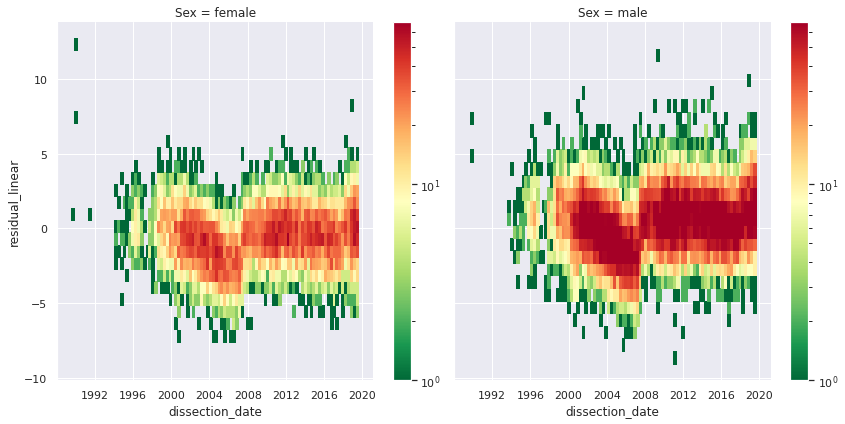

In [14]:
## Investigate the AVD issue.  Build a simple linear model, compute residuals, and plot

from sklearn.linear_model import LinearRegression

X = df[['Height_cm','Weight_kg','Age']]
y = df['AVD']
reg = LinearRegression().fit(X, y)
df['residual_linear'] = y - reg.predict(X)

plt.hist2d(df['dissection_date'], df['residual_linear'], bins=(100,25), norm=mpl.colors.LogNorm(), cmap="RdYlGn_r")
plt.show()

g = sns.FacetGrid(df, col="Sex", height=6)
g.map(sns.histplot, "dissection_date", "residual_linear", bins=(100,25), 
      cbar=True, cmap="RdYlGn_r", norm=mpl.colors.LogNorm(), vmin=None, vmax=None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


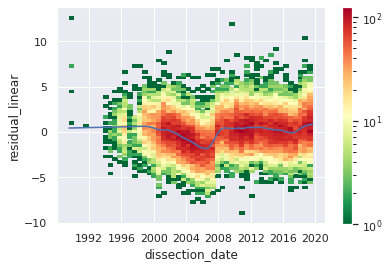

In [17]:
## Plot the LOESS fit of the residuals themselves

import statsmodels.api as stm

class Lowess:
    """ Simple class to provide a scikit-learn interface to statmodel's lowess"""
    def __init__(self, frac=1.0):
        assert 0 < frac < 1
        self.frac = frac

    def fit(self, x, y):
        assert len(x) == len(y)
        self.x = x
        self.y = y
        return self
        
    def predict(self, x=None):
        if x != None:
          raise NotImplementedError()
        prediction = stm.nonparametric.lowess(endog = self.y,
                                              exog = self.x,
                                              frac = self.frac,
                                              #xvals = x,
                                              is_sorted = False,
                                              return_sorted = False)
        ## do not assume that input is sorted (is_sorted=False is the default but good to be explicit)
        ## return_sorted==False ensures that output is returned in the original order if xvals==None
        return prediction

smoother = Lowess(frac = 0.1)
smoother.fit( df['dissection_date'], df['residual_linear'] )
df['residual_lowess'] = smoother.predict()   ## predict for existing values

sns.histplot(df, x="dissection_date", y="residual_linear", bins=(50,70), cbar=True, cmap="RdYlGn_r", norm=mpl.colors.LogNorm(), vmin=None, vmax=None )

plt.plot(df['dissection_date'], df['residual_lowess'])

plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


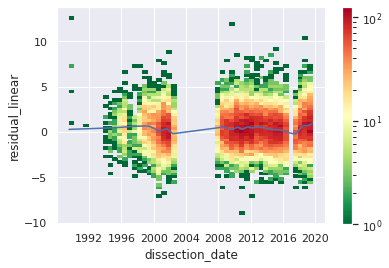

In [18]:
## How to fix this?  Easiest is to remove data where the smoothed residual is negative
df = df[ df['residual_lowess'] >= 0 ]
smoother.fit( df['dissection_date'], df['residual_linear'] )
p = smoother.predict()
df.loc[:,'residual_lowess'] = p   ## predict for existing values
sns.histplot(df, x="dissection_date", y="residual_linear", bins=(50,70), cbar=True, cmap="RdYlGn_r", norm=mpl.colors.LogNorm(), vmin=None, vmax=None )
plt.plot(df['dissection_date'], df['residual_lowess'])
plt.show()
